In [207]:
import networkx as nx
import matplotlib.pyplot as plt
from src.Gates import PauliGate, PauliExpression

# Approach I) Form graph w. edges between non-commuting terms and perform graph coloring
# Approach II) Form graph w. edges between commuting terms and perform minimum-clique cover

In [208]:
term= 'xy'
obj = PauliGate(name=term)
obj.matrix()

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j],
       [0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
       [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [209]:
expression = 'zz+zz+yy-zy+xy+xx'
obj = PauliExpression(expression=expression)
obj.terms()

{0: 'zz', 1: 'zz', 2: 'yy', 3: 'zy', 4: 'xy', 5: 'xx'}

In [210]:
obj.commutator_map()

{(0, 1): True,
 (0, 2): True,
 (0, 3): False,
 (0, 4): True,
 (0, 5): True,
 (1, 2): True,
 (1, 3): False,
 (1, 4): True,
 (1, 5): True,
 (2, 3): False,
 (2, 4): False,
 (2, 5): True,
 (3, 4): False,
 (3, 5): True,
 (4, 5): False}

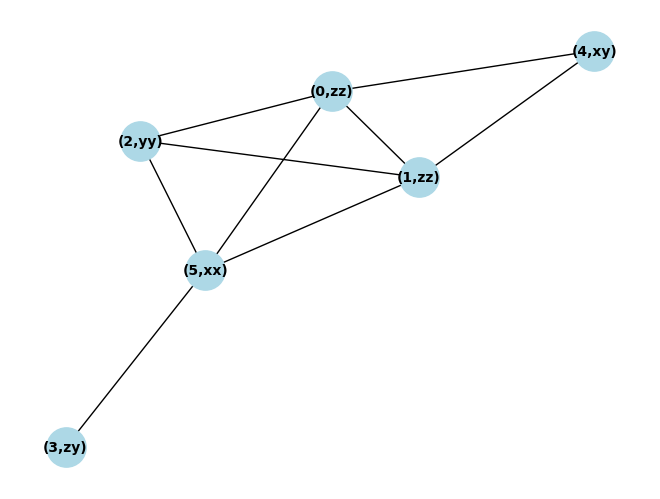

In [211]:
G = nx.Graph()
for term_idx, label in obj.terms().items():
    G.add_node(node_for_adding='('+str(term_idx)+','+label+')')
for (i,j), are_commutating in obj.commutator_map().items():
    if are_commutating:
        edge_i, edge_j = '('+str(i)+','+obj.terms()[i]+')', '('+str(j)+','+obj.terms()[j]+')'
        G.add_edge(u_of_edge=edge_i,v_of_edge=edge_j)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, font_size=10, font_weight='bold')
plt.show()

In [212]:
# Create complement graph
complement_graph = nx.complement(G)

# Find graph coloring
coloring = nx.coloring.greedy_color(complement_graph, strategy="largest_first")

# Organize nodes by color (each color class is a clique in the original graph)
clique_cover = {}
for node, color in coloring.items():
    if color in clique_cover:
        clique_cover[color].append(node)
    else:
        clique_cover[color] = [node]

# The values of clique_cover are the cliques
min_clique_cover = list(clique_cover.values())
print(min_clique_cover)

[['(3,zy)', '(5,xx)'], ['(4,xy)', '(0,zz)', '(1,zz)'], ['(2,yy)']]
